In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [1]:
#data management tools
import pandas as pd
import numpy as np
import imblearn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization


# #Models
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression


# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Dataloading and Preprocessing

In [2]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [3]:
START = datetime.date(2010,7,1)
END = datetime.date(2010,8, 30)

In [4]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [5]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [6]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [7]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    #stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    #lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    #lower_words = [str.lower(tok) for tok in lemmed_words]
    lower_words = [str.lower(tok) for tok in filtered_tokens]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
#lancaster = LancasterStemmer()
#lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be se

# TFIDF

In [9]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
df3_bs['df3tfidf_max'] = tfidf_df3.max()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/273645768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/273645768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_max'] = tfidf_df3.max()


In [11]:
tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
df4_bs['df4tfidf_max'] = tfidf_df4.max()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/2607303763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/2607303763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_max'] = tfidf_df4.max()


In [12]:
tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
df5_bs['df5tfidf_max'] = tfidf_df5.max()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/2696482291.py:2: RuntimeWarning: invalid value encountered in divide
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/2696482291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_90102/2696482291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

# Aggregate all data

In [13]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [14]:
df_merged['label'] = 'normal'

In [15]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [16]:
dates = df_merged['day_date']
dates = dates.unique()

In [17]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['to'].notnull()].shape[0]
        file_count = userd[userd['filename'].notnull()].shape[0]
        http_count = userd[userd['url'].notnull()].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        tfidf3_mean = userd['df3tfidf_mean'].mean()
        tfidf4_mean = userd['df4tfidf_mean'].mean()
        tfidf5_mean = userd['df5tfidf_mean'].mean()
        # tfidf3_max = userd['df3tfidf_mean'].max()
        # tfidf4_max = userd['df4tfidf_mean'].max()
        # tfidf5_max = userd['df5tfidf_mean'].max()
        
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 1
        else: label = 0
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, tfidf3_mean, tfidf4_mean, tfidf5_mean, label])


In [18]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'tfidf3_mean', 'tfidf4_mean', 'tfidf5_mean', 'label'])


In [19]:
final = final.dropna(subset=['tfidf5_mean', 'tfidf3_mean', 'tfidf4_mean'])

In [20]:
final['date'] = (final['date'] - final['date'].min())  / np.timedelta64(1,'D')

In [21]:
label_encoder = LabelEncoder()

In [22]:
final['username'] = label_encoder.fit_transform(final['username'])

# Sampling Methods

<Axes: xlabel='label', ylabel='count'>

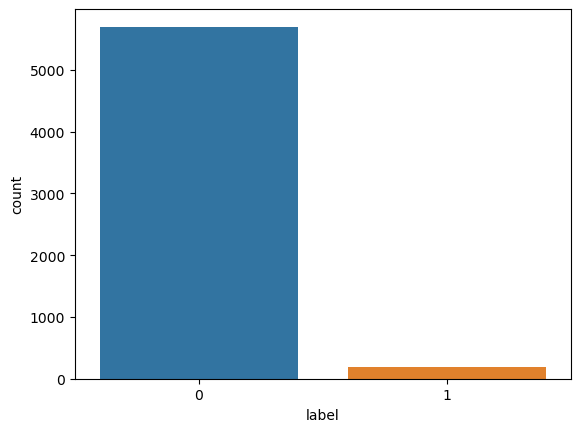

In [23]:
sb.countplot(data=final, x='label')

In [24]:
X = final.loc[:, final.columns != 'label']

In [25]:
y = final['label']

In [26]:
final_undersample = RandomUnderSampler(sampling_strategy='majority')
X_final_under, y_final_under = final_undersample.fit_resample(X, y)

In [27]:
final_oversample = RandomOverSampler(sampling_strategy='minority')
X_final_over, y_final_over = final_oversample.fit_resample(X, y)

In [28]:
final_smote = SMOTE(k_neighbors=5)
X_final_smote, y_final_smote = final_smote.fit_resample(X, y)

In [29]:
final_blsmote = BorderlineSMOTE()
X_final_blsmote, y_final_blsmote = final_blsmote.fit_resample(X, y)

In [30]:
final_adasyn = ADASYN()
X_final_adasyn, y_final_adasyn = final_adasyn.fit_resample(X, y)

In [31]:
final_under = X_final_under.copy()
final_over = X_final_over.copy()
final_smote = X_final_smote.copy()
final_blsmote = X_final_blsmote.copy()
final_adasyn = X_final_adasyn.copy()

In [32]:
final_under['label'] = y_final_under
final_over['label'] = y_final_over
final_smote['label'] = y_final_smote
final_blsmote['label'] = y_final_blsmote
final_adasyn['label'] = y_final_adasyn

<Axes: xlabel='label', ylabel='tfidf5_mean'>

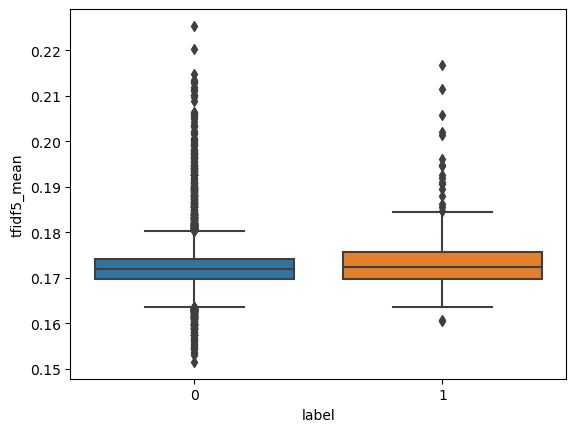

In [33]:
sb.boxplot(data=final, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

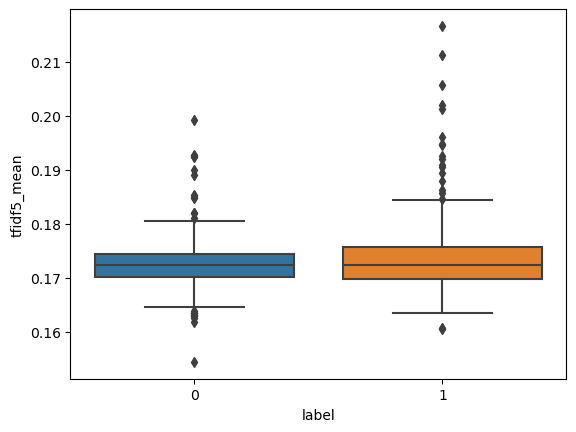

In [34]:
sb.boxplot(data=final_under, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

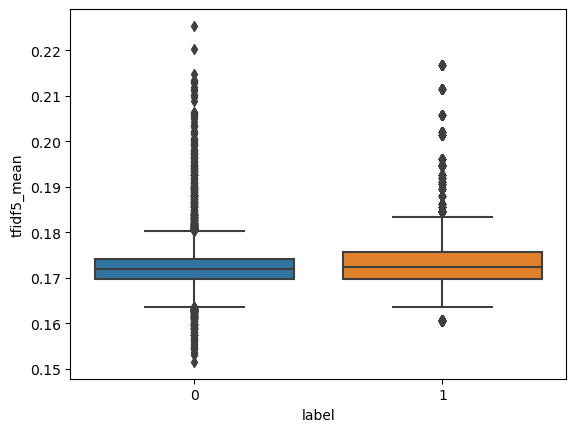

In [35]:
sb.boxplot(data=final_over, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

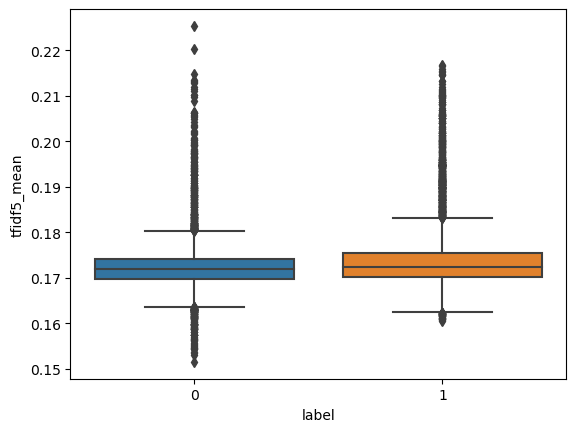

In [36]:
sb.boxplot(data=final_smote, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

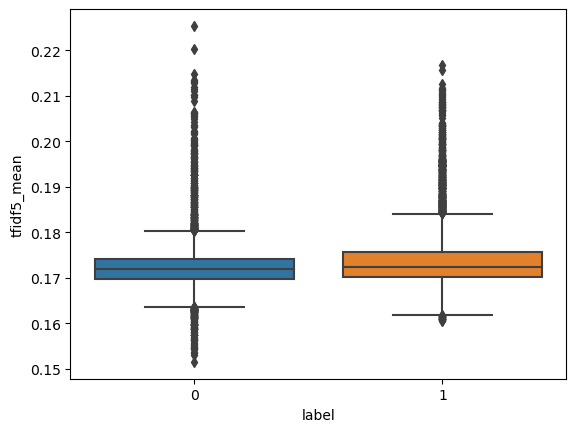

In [37]:
sb.boxplot(data=final_blsmote, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

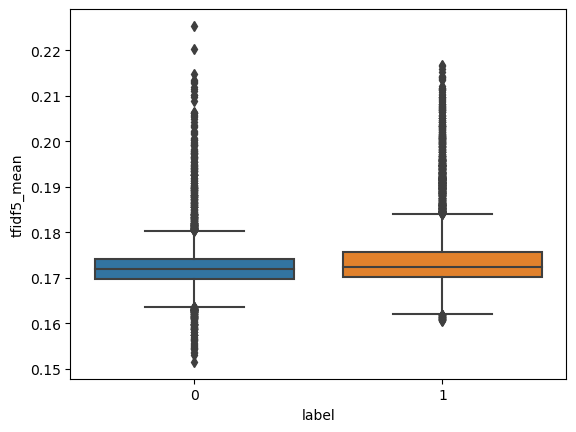

In [38]:
sb.boxplot(data=final_adasyn, x="label", y='tfidf5_mean')

In [88]:
temp5_mean0 = final[final['label'] == 0].sample(30)
temp5_mean1 = final[final['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-1.991405515448931 0.051152991496246886


In [89]:
temp5_mean0 = final_under[final_under['label'] == 0].sample(30)
temp5_mean1 = final_under[final_under['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-0.8517801168201977 0.3978395113739088


In [90]:
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-0.8517801168201977 0.3978395113739088


In [91]:
temp5_mean0 = final_over[final_over['label'] == 0].sample(30)
temp5_mean1 = final_over[final_over['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-1.6871583584542573 0.09694463293820338


In [92]:
temp5_mean0 = final_smote[final_smote['label'] == 0].sample(30)
temp5_mean1 = final_smote[final_smote['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-1.1710978527585216 0.2463483175912328


In [93]:
temp5_mean0 = final_blsmote[final_blsmote['label'] == 0].sample(30)
temp5_mean1 = final_blsmote[final_blsmote['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-1.3549253441776825 0.18069542672003458


In [94]:
temp5_mean0 = final_adasyn[final_adasyn['label'] == 0].sample(20)
temp5_mean1 = final_adasyn[final_adasyn['label'] == 1].sample(20)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

-0.14820082811533147 0.8829679138783667


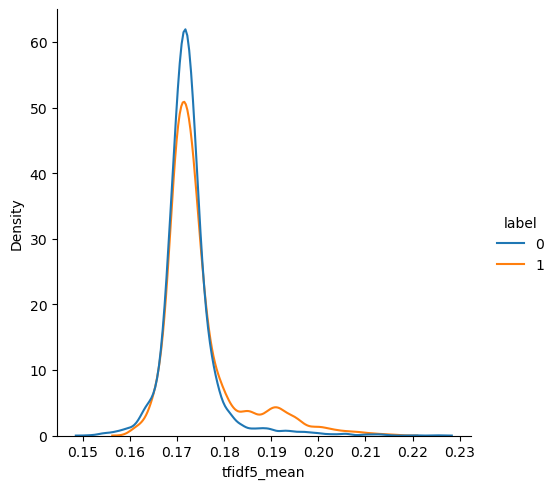

In [46]:
sb.displot(data=final_adasyn, x="tfidf5_mean", hue="label", kind='kde')

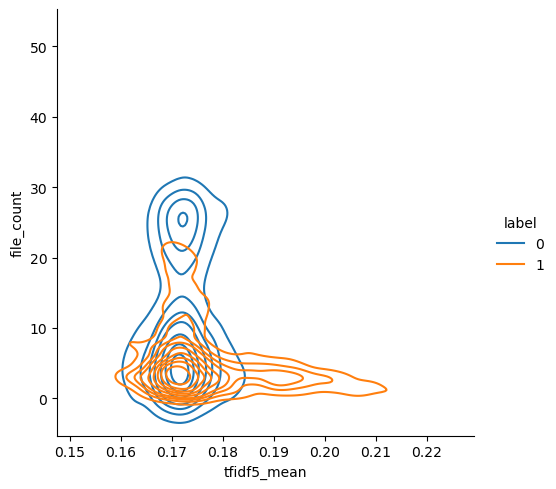

In [47]:
#sb.histplot(data=temp5['tfidf5_mean'])
sb.displot(data=final_adasyn, x="tfidf5_mean", y='file_count', hue="label", kind='kde')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9671760045274477
Logistic Regression Recall: 0.0


In [49]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)
print(cf_matrix)

[[1709    0]
 [  58    0]]


In [50]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_final_under, y_final_under, test_size=0.3)

In [51]:
classifier_under = LogisticRegression(max_iter=1000)

classifier_under.fit(X_train_under, y_train_under)

predicted_under = classifier_under.predict(X_test_under)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_under, predicted_under))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_under, predicted_under))

Logistic Regression Accuracy: 0.7017543859649122
Logistic Regression Recall: 0.7049180327868853


In [52]:
cf_matrix = metrics.confusion_matrix(y_test_under,predicted_under)
print(cf_matrix)

[[37 16]
 [18 43]]


In [54]:
sample_under = final.sample(5000)
X_under = sample_under.loc[:, sample_under.columns != 'label']
y_under = sample_under['label']
predicted_under = classifier_under.predict(X_under)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_under, predicted_under))
print("Logistic Regression Recall:",metrics.recall_score(y_under, predicted_under))

Logistic Regression Accuracy: 0.7276
Logistic Regression Recall: 0.7548387096774194


In [55]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_final_over, y_final_over, test_size=0.3)


classifier_over = LogisticRegression(max_iter=1000)

classifier_over.fit(X_train_over, y_train_over)

predicted_over = classifier_over.predict(X_test_over)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_over, predicted_over))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_over, predicted_over))

Logistic Regression Accuracy: 0.7736180169640245
Logistic Regression Recall: 0.8147492625368732


In [56]:
cf_matrix = metrics.confusion_matrix(y_test_over,predicted_over)
print(cf_matrix)

[[1264  460]
 [ 314 1381]]


In [58]:
sample_over = final.sample(5000)
X_over = sample_over.loc[:, sample_over.columns != 'label']
y_over = sample_over['label']
predicted_over = classifier_over.predict(X_over)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_over, predicted_over))
print("Logistic Regression Recall:",metrics.recall_score(y_over, predicted_over))

Logistic Regression Accuracy: 0.7358
Logistic Regression Recall: 0.8291139240506329


In [59]:
cf_matrix = metrics.confusion_matrix(y_over,predicted_over)
print(cf_matrix)

[[3548 1294]
 [  27  131]]


# SMOTE Analysis with Logistic Regression

In [60]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_final_smote, y_final_smote, test_size=0.3)

In [62]:
classifier_smote = LogisticRegression(max_iter=1000)

classifier_smote.fit(X_train_smote, y_train_smote)

predicted_smote = classifier_smote.predict(X_test_smote)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_smote, predicted_smote))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_smote, predicted_smote))

cf_matrix = metrics.confusion_matrix(y_test_smote,predicted_smote)
print(cf_matrix)

sample_smote = final.sample(5000)
X_smote = sample_smote.loc[:, sample_smote.columns != 'label']
y_smote = sample_smote['label']
predicted_smote = classifier_smote.predict(X_smote)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_smote, predicted_smote))
print("Logistic Regression Recall:",metrics.recall_score(y_smote, predicted_smote))

cf_matrix = metrics.confusion_matrix(y_smote,predicted_smote)
print(cf_matrix)


Logistic Regression Accuracy: 0.792044457443697
Logistic Regression Recall: 0.8574807806031933
[[1258  470]
 [ 241 1450]]
Logistic Regression Accuracy: 0.7398
Logistic Regression Recall: 0.7962962962962963
[[3570 1268]
 [  33  129]]


In [189]:
#df_person = final.loc[(final['username'] == 'JJM0203')]

In [190]:
#df_badusers = final.loc[(final['label'] == 1)]

In [191]:
#df_badusers

In [192]:
# X = df_person[['login_count', 'logout_count', 'email_count', 'file_count', 'http_count']].copy()
# y = df_person['label']

In [193]:
X = final[['login_count', 'logout_count', 'email_count', 'file_count', 'http_count']].copy()
y = final['label']

In [194]:
#X = np.array(X).reshape(len(X), 1)

In [196]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)